In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import itertools

In [2]:
%load_ext rpy2.ipython

In [3]:
abundances = pd.read_csv('datasets/cutleish.tsv', sep='\t', index_col=0)

In [4]:
abundances

,HS01,HS02,HS03,HS04,HS05,CL08,CL10,CL11,CL12,CL13
gene_info,,,,,,,,,,
ENSG00000000003|TSPAN6|776,1178.54900,1534.935800,1404.323100,470.273850,55.170580,972.947270,472.308200,633.732410,494.758500,941.473000
ENSG00000000005|TNMD|956,467.00040,388.000000,725.000500,142.000490,26.000000,11.000000,14.000000,9.000000,2.000000,5.999998
ENSG00000000419|DPM1|912,1904.21166,2372.764500,1964.865485,723.565267,74.408840,2372.527480,1051.338910,1881.526200,1860.320268,3144.700035
ENSG00000000457|SCYL3|6059,1579.23060,1598.061190,1822.791900,531.706376,52.521019,1582.179363,921.921733,1396.882100,1519.236000,2161.262500
ENSG00000000460|C1orf112|676,415.06749,473.596001,586.819290,189.063790,15.962650,333.662900,447.648390,588.048526,534.568132,784.763827
...,...,...,...,...,...,...,...,...,...,...
ENSG00000289549|PPIAL4D|246,2.00399,2.974280,0.185482,0.000000,0.000000,0.000000,0.000000,1.361810,1.509280,0.000000
ENSG00000289565|ENSG00000289565|316,106.47100,185.689020,130.447000,71.190360,8.603120,281.971680,128.528000,130.235000,166.436360,221.373440
ENSG00000289604|CTAGE8|2339,746.66300,203.792000,1095.610000,145.816000,0.000000,116.501000,46.681500,141.203000,66.216400,35.785000


<Axes: >

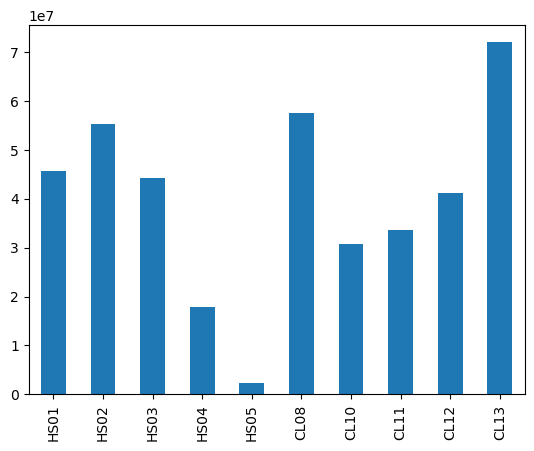

In [7]:
abundances.sum().plot.bar()

In [10]:
gene_length = abundances.index.to_series().str.split('|').str[2].astype(int)
gene_length

gene_info
ENSG00000000003|TSPAN6|776              776
ENSG00000000005|TNMD|956                956
ENSG00000000419|DPM1|912                912
ENSG00000000457|SCYL3|6059             6059
ENSG00000000460|C1orf112|676            676
                                       ... 
ENSG00000289549|PPIAL4D|246             246
ENSG00000289565|ENSG00000289565|316     316
ENSG00000289604|CTAGE8|2339            2339
ENSG00000289685|MRPS5|544               544
ENSG00000289719|ENSG00000289719|292     292
Name: gene_info, Length: 29658, dtype: int64

In [15]:
abund_id = abundances.divide(gene_length/1000, axis=0)
abund_tpm = abund_id.divide(abund_id.sum(axis=0)/1e6, axis=1)
abund_tpm.head()

,HS01,HS02,HS03,HS04,HS05,CL08,CL10,CL11,CL12,CL13
gene_info,,,,,,,,,,
ENSG00000000003|TSPAN6|776,13.450765,14.184814,16.307136,13.260348,12.638846,8.802274,7.777648,9.299672,5.957490,6.510023
ENSG00000000005|TNMD|956,4.326338,2.910509,6.833651,3.250108,4.834784,0.080780,0.187135,0.107203,0.019548,0.033677
ENSG00000000419|DPM1|912,18.491896,18.657565,19.413791,17.359959,14.504117,18.263489,14.731007,23.493022,19.060078,18.502089
ENSG00000000457|SCYL3|6059,2.308371,1.891418,2.710869,1.920157,1.540969,1.833252,1.944364,2.625320,2.342913,1.914005
ENSG00000000460|C1orf112|676,5.437924,5.024079,7.822220,6.119663,4.197782,3.465202,8.462036,9.905808,7.389043,6.229148


In [ ]:
abund_id.sum().plot.bar()

<Axes: >

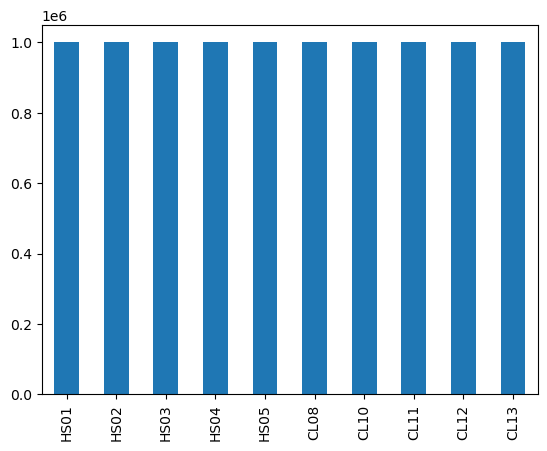

In [18]:
abund_tpm.sum().plot.bar()

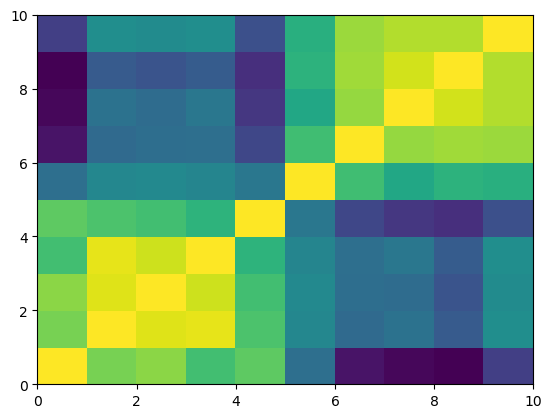

In [19]:
plt.pcolor(abund_tpm.corr())

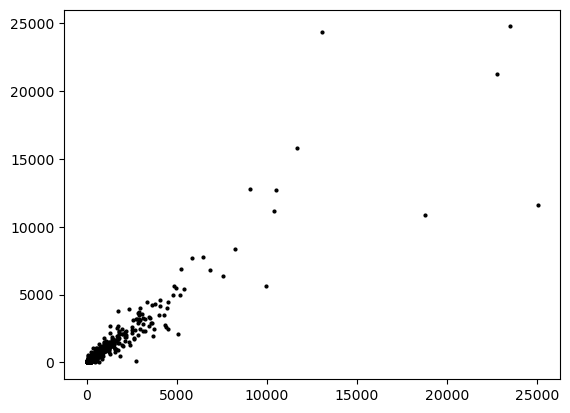

In [20]:
plt.scatter(abund_tpm['HS01'], abund_tpm['HS02'], c='black', s=4)

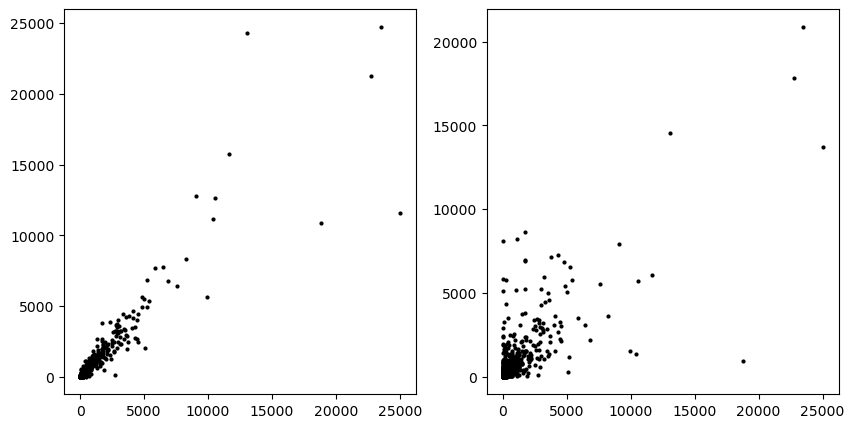

In [22]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].scatter(abund_tpm['HS01'], abund_tpm['HS02'], c='black', s=4)
axes[1].scatter(abund_tpm['HS01'], abund_tpm['CL08'], c='black', s=4)

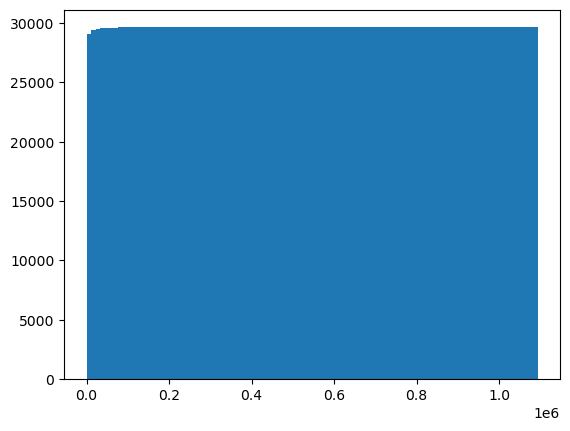

In [24]:
plt.hist(abundances['HS01'], bins=100, cumulative=True)
None

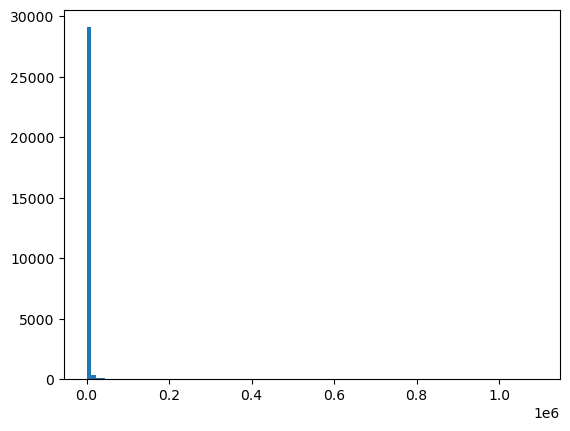

In [25]:
plt.hist(abundances['HS01'], bins=100)
None

In [27]:
l2abund = np.log2(abund_tpm+1)
l2abund

,HS01,HS02,HS03,HS04,HS05,CL08,CL10,CL11,CL12,CL13
gene_info,,,,,,,,,,
ENSG00000000003|TSPAN6|776,3.853074,3.924557,4.113295,3.833937,3.769650,3.293117,3.133834,3.364527,2.798567,2.908817
ENSG00000000005|TNMD|956,2.413144,1.967357,2.969685,2.087499,2.544679,0.112072,0.247484,0.146920,0.027930,0.047785
ENSG00000000419|DPM1|912,4.284803,4.297013,4.351472,4.198491,3.954579,4.267797,3.975539,4.614299,4.326255,4.285557
ENSG00000000457|SCYL3|6059,1.726121,1.531777,1.891757,1.546046,1.345379,1.502459,1.557956,1.858108,1.741106,1.543003
ENSG00000000460|C1orf112|676,2.686595,2.590741,3.141142,2.831809,2.377896,2.158725,3.242151,3.447025,3.068506,2.853826
...,...,...,...,...,...,...,...,...,...,...
ENSG00000289549|PPIAL4D|246,0.100503,0.119960,0.009769,0.000000,0.000000,0.000000,0.000000,0.088194,0.080423,0.000000
ENSG00000289565|ENSG00000289565|316,1.994234,2.382390,2.238725,2.567902,2.545927,2.860862,2.631688,2.509226,2.565950,2.250665
ENSG00000289604|CTAGE8|2339,1.936287,0.700276,2.384280,1.241281,0.000000,0.432614,0.327727,0.754839,0.338596,0.113825


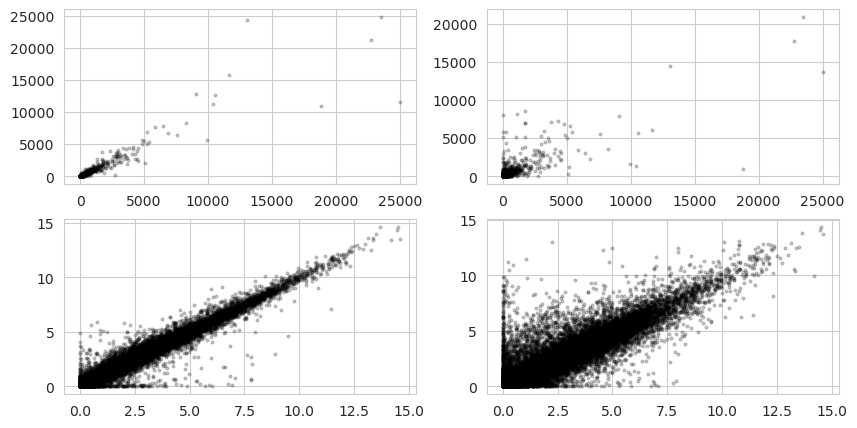

In [61]:
fig, axes = plt.subplots(2,2,figsize=(10,5))
axes[0,0].scatter(abund_tpm['HS01'], abund_tpm['HS02'], c='black', s=4, alpha=.2)
axes[0,1].scatter(abund_tpm['HS01'], abund_tpm['CL08'], c='black', s=4, alpha=.2)
axes[1,0].scatter(l2abund['HS01'], l2abund['HS02'], c='black', s=4, alpha=.2)
axes[1,1].scatter(l2abund['HS01'], l2abund['CL08'], c='black', s=4, alpha=.2)

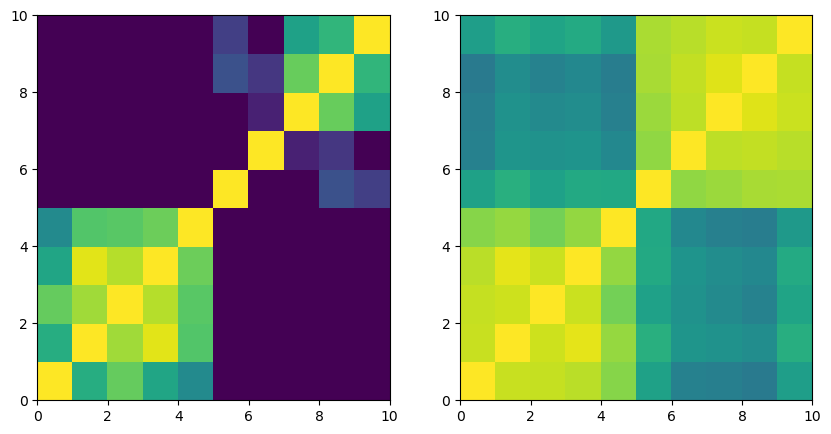

In [32]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].pcolor(abundances.corr(), vmin=0.8, vmax=1)
axes[1].pcolor(l2abund.corr(), vmin=0.8, vmax=1)

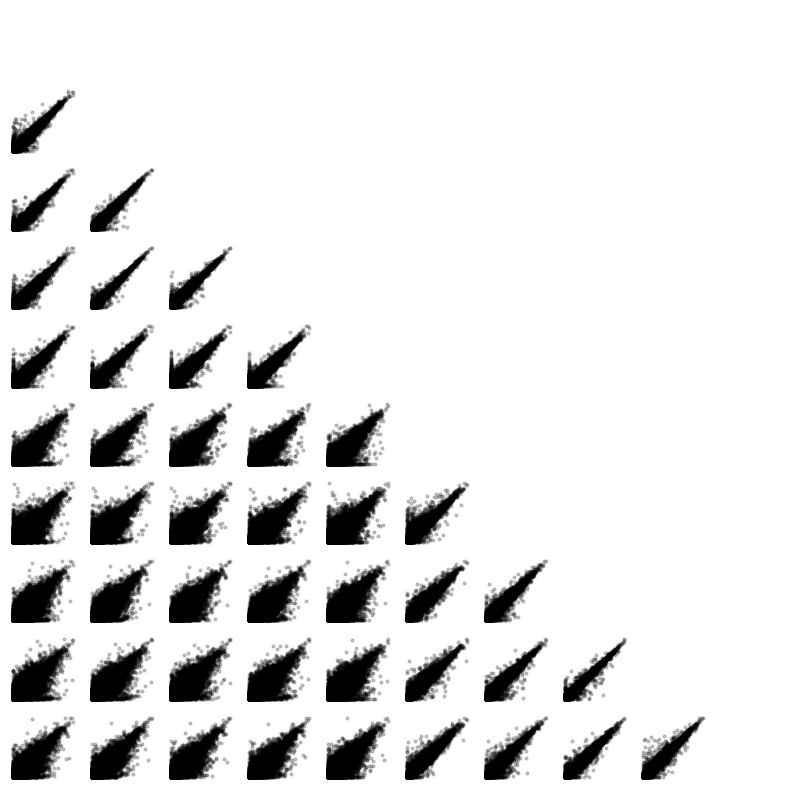

In [36]:
NUMSAMPLES = len(l2abund.columns)

fig, axes = plt.subplots(NUMSAMPLES, NUMSAMPLES, figsize=(10,10))

for i, col1 in enumerate(l2abund.columns):
    for j, col2 in enumerate(l2abund.columns):
        if i>j:
            axes[i,j].scatter(l2abund[col1], l2abund[col2], c='black',s=4, alpha=.2)
        axes[i,j].axis('off')

In [ ]:
s1 = 'HS01'
s2 = 'CL12'
M = l2abund[s2] - l2abund[s1]
A = l2abund[[s1,s2]].mean(axis=1)
plt.scatter(A,M,c='black',s=4,alpha=.1)
plt.axhline(0, c='red')

(-2.0, 2.0)

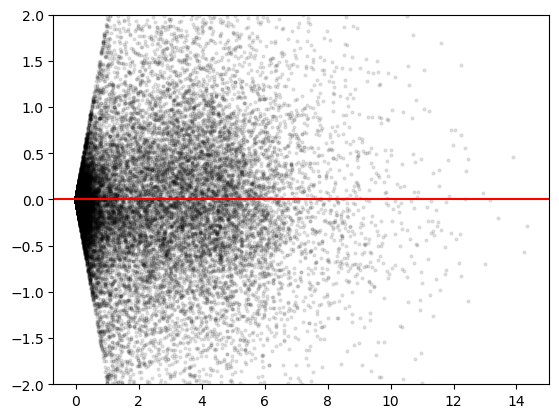

In [40]:
s1 = 'HS01'
s2 = 'CL12'
M = l2abund[s2] - l2abund[s1]
A = l2abund[[s1,s2]].mean(axis=1)
plt.scatter(A,M,c='black',s=4,alpha=.1)
plt.axhline(0, c='red')
plt.ylim(-2,2)

In [46]:
pd.DataFrame(
    [[s1,s2,np.median(l2abund[s1]-l2abund[s2])]
     for s1, s2 in itertools.combinations(l2abund.columns,2)],
    columns=['s1','s2','meddiff'])

,s1,s2,meddiff
0,HS01,HS02,0.000000
1,HS01,HS03,-0.029419
2,HS01,HS04,0.000000
3,HS01,HS05,0.000000
4,HS01,CL08,0.008469
5,HS01,CL10,0.000000
6,HS01,CL11,0.000000
7,HS01,CL12,0.000000
8,HS01,CL13,0.000000
9,HS02,HS03,-0.020102


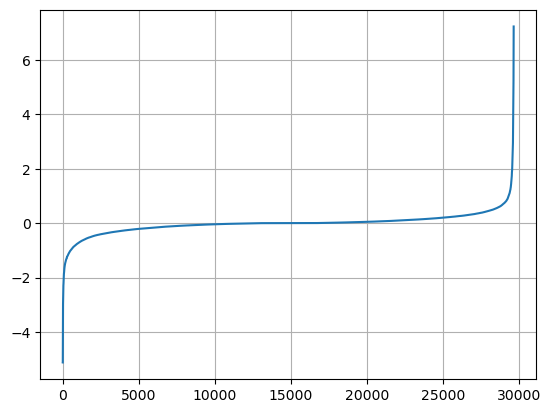

In [48]:
plt.plot(sorted(l2abund['HS01']-l2abund['HS02']))
plt.grid()

In [50]:
l2abund[l2abund['HS01']==l2abund['HS02']]

,HS01,HS02,HS03,HS04,HS05,CL08,CL10,CL11,CL12,CL13
gene_info,,,,,,,,,,
ENSG00000006116|CACNG3|1668,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.021937,0.000000,0.000000,0.000000
ENSG00000008197|TFAP2D|448,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.040575,0.071538,0.000000,0.000000
ENSG00000016490|CLCA1|3061,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.011996,0.000000,0.000000,0.002527
ENSG00000054356|PTPRN|802,0.0,0.0,0.047827,0.113499,0.0,0.085800,0.711799,0.173496,0.097483,0.401790
ENSG00000054796|SPO11|884,0.0,0.0,0.014632,0.103339,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
ENSG00000287363|GUCA1ANB|552,0.0,0.0,0.000000,0.083977,0.0,0.036238,0.000000,0.079335,0.000000,0.000000
ENSG00000287515|ENSG00000287515|1895,0.0,0.0,0.214374,0.000000,0.0,0.148216,0.070183,0.000000,0.000000,0.075584
ENSG00000287694|ENSG00000287694|74,0.0,0.0,1.380523,0.000000,0.0,0.514627,0.000000,0.000000,0.000000,0.422505


In [53]:
(l2abund>1).sum(axis=1) >=3

gene_info
ENSG00000000003|TSPAN6|776              True
ENSG00000000005|TNMD|956                True
ENSG00000000419|DPM1|912                True
ENSG00000000457|SCYL3|6059              True
ENSG00000000460|C1orf112|676            True
                                       ...  
ENSG00000289549|PPIAL4D|246            False
ENSG00000289565|ENSG00000289565|316     True
ENSG00000289604|CTAGE8|2339             True
ENSG00000289685|MRPS5|544               True
ENSG00000289719|ENSG00000289719|292    False
Length: 29658, dtype: bool

In [55]:
l2hi = l2abund[(l2abund>1).sum(axis=1) >=3]
l2hi

,HS01,HS02,HS03,HS04,HS05,CL08,CL10,CL11,CL12,CL13
gene_info,,,,,,,,,,
ENSG00000000003|TSPAN6|776,3.853074,3.924557,4.113295,3.833937,3.769650,3.293117,3.133834,3.364527,2.798567,2.908817
ENSG00000000005|TNMD|956,2.413144,1.967357,2.969685,2.087499,2.544679,0.112072,0.247484,0.146920,0.027930,0.047785
ENSG00000000419|DPM1|912,4.284803,4.297013,4.351472,4.198491,3.954579,4.267797,3.975539,4.614299,4.326255,4.285557
ENSG00000000457|SCYL3|6059,1.726121,1.531777,1.891757,1.546046,1.345379,1.502459,1.557956,1.858108,1.741106,1.543003
ENSG00000000460|C1orf112|676,2.686595,2.590741,3.141142,2.831809,2.377896,2.158725,3.242151,3.447025,3.068506,2.853826
...,...,...,...,...,...,...,...,...,...,...
ENSG00000288859|H2AC19|315,4.621599,4.959736,4.054766,5.386963,5.913059,6.865474,6.689706,7.144090,7.529547,5.113777
ENSG00000288920|RPSAP58|752,2.930866,2.495874,2.389661,2.157695,3.029668,1.182703,0.765130,0.859131,1.264478,1.123102
ENSG00000289565|ENSG00000289565|316,1.994234,2.382390,2.238725,2.567902,2.545927,2.860862,2.631688,2.509226,2.565950,2.250665


(-2.0, 2.0)

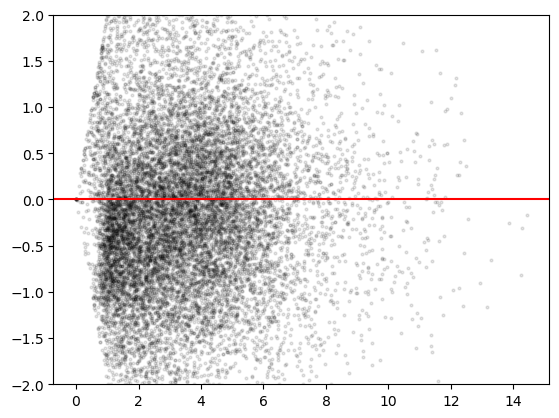

In [57]:
s1 = 'HS03'
s2 = 'CL08'
M = l2hi[s2] - l2hi[s1]
A = l2hi[[s1,s2]].mean(axis=1)
plt.scatter(A,M,c='black',s=4,alpha=.1)
plt.axhline(0, c='red')
plt.ylim(-2,2)

[(-5.0, 5.0)]

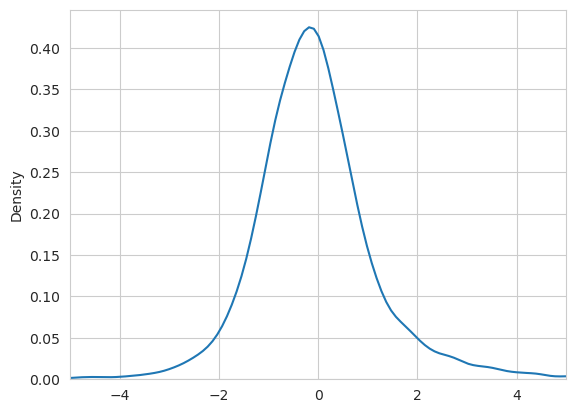

In [59]:
sns.set_style('whitegrid')
sns.kdeplot(l2hi[s2]-l2hi[s1]).set(xlim=(-5,5))

In [62]:
- 모든 샘플에서 0 이상을 고른다.
- M이 0.3에서 0.7 사이를 고른다.
- A가 0.05에서 0.95 사이인 것을 고른다.
- HS05가 매우 낮기 때문에 shift가 생길 수 있음, 때문에 이를 가정해서 진행

SyntaxError: invalid decimal literal (2587839167.py, line 2)

(-12.0, 2.0)

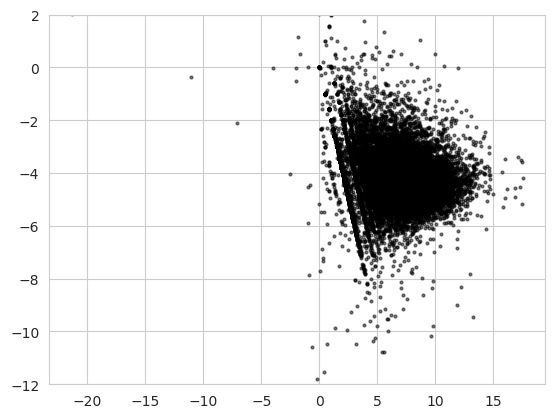

In [65]:
reference = 'HS01'
sample = 'HS05'

l2nonzero = np.log2(abundances[(abundances>0).all(axis=1)])
M = l2nonzero[sample] - l2nonzero[reference]
A = l2nonzero[[reference,sample]].mean(axis=1)
plt.scatter(A, M, s=4, c='black', alpha=.5)
plt.ylim(-12,2)

In [66]:
M_lo, M_hi = np.percentile(M, [30,70])
A_lo, A_hi = np.percentile(A, [5,95])
(M_lo,M_hi), (A_lo,A_hi)

((-4.632632276492584, -3.7873546683731325),
 (2.3332098033693924, 10.762433233562643))

In [68]:
trimmed_M = M[(M>M_lo)&(M<M_hi)&(A>A_lo)&(A<A_hi)]
trimmed_M

gene_info
ENSG00000000003|TSPAN6|776    -4.416969
ENSG00000000005|TNMD|956      -4.166840
ENSG00000001167|NFYA|5960     -4.098708
ENSG00000001460|STPG1|59      -4.171327
ENSG00000001461|NIPAL3|682    -4.631011
                                 ...   
ENSG00000287080|H3C3|237      -4.357552
ENSG00000288642|CDR1|540      -4.415037
ENSG00000288649|ACTL10|1334   -3.874469
ENSG00000288920|RPSAP58|752   -4.214002
ENSG00000289685|MRPS5|544     -4.125226
Length: 6256, dtype: float64

In [69]:
trimmed_M.mean()

-4.217617153516294

(-5.0, 5.0)

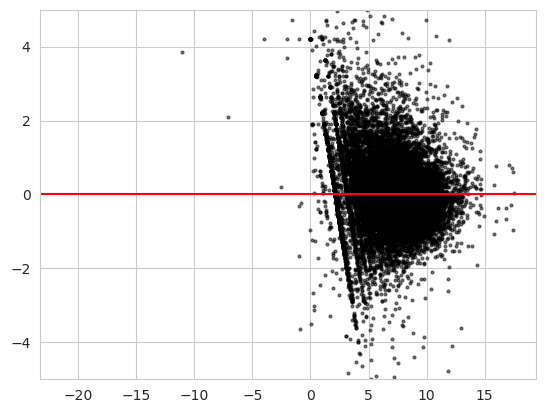

In [70]:
reference = 'HS01'
sample = 'HS05'

l2nonzero = np.log2(abundances[(abundances>0).all(axis=1)])
plt.scatter(A, M - trimmed_M.mean(), s=4, c='black', alpha=.5)
plt.ylim(-12,2)
plt.axhline(0, c='red')
plt.ylim(-5,5)

In [71]:
def calc_TMM(reference,sample):
    l2nonzero = np.log2(abundances[(abundances>0).all(axis=1)])
    M = l2nonzero[sample] - l2nonzero[reference]
    A = l2nonzero[[reference,sample]].mean(axis=1)

    M_lo, M_hi = np.percentile(M, [30,70])
    A_lo, A_hi = np.percentile(A, [5,95])
    return M[(M>M_lo)&(M<M_hi)&(A>A_lo)&(A<A_hi)].mean()

calc_TMM('HS01','HS05')

-4.217617153516294

In [72]:
normfactors = pd.Series({
    s: calc_TMM('HS01',s) if s != 'HS01' else 0
    for s in abundances.columns})
normfactors

HS01    0.000000
HS02    0.321227
HS03    0.125791
HS04   -1.312341
HS05   -4.217617
CL08    0.146196
CL10   -0.487293
CL11   -0.389321
CL12   -0.184631
CL13    0.678082
dtype: float64

In [74]:
abundances_tmm = np.log2(abundances.divide(2**normfactors, axis=1) + 1)

In [75]:
abundances_tmm.head()

,HS01,HS02,HS03,HS04,HS05,CL08,CL10,CL11,CL12,CL13
gene_info,,,,,,,,,,
ENSG00000000003|TSPAN6|776,10.204020,10.263910,10.330988,10.190933,10.004849,9.781662,9.373056,9.698788,9.137775,9.203144
ENSG00000000005|TNMD|956,8.870366,8.283324,9.378216,8.466179,8.921036,3.451532,4.366348,3.676718,1.710637,2.247919
ENSG00000000419|DPM1|912,10.895736,10.891886,10.815224,10.812123,10.436061,11.066686,10.526284,11.267594,11.046649,10.941359
ENSG00000000457|SCYL3|6059,10.625919,10.322008,10.707006,10.367919,9.933916,10.482510,10.336910,10.838104,10.754597,10.400645
ENSG00000000460|C1orf112|676,8.700674,8.570087,9.073661,8.878140,8.219095,8.240829,9.295813,9.590984,9.249234,8.940972


In [76]:
l2tmm = abundances_tmm

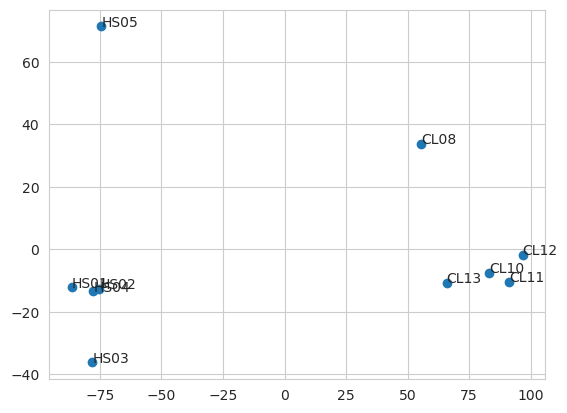

In [81]:
from sklearn.decomposition import PCA
l2pca = PCA(n_components=2).fit_transform(l2abund.values.T)
plt.scatter(l2pca[:,0], l2pca[:,1])
for (pc1, pc2), label in zip (l2pca, l2abund.columns):
    plt.annotate(label, (pc1, pc2))

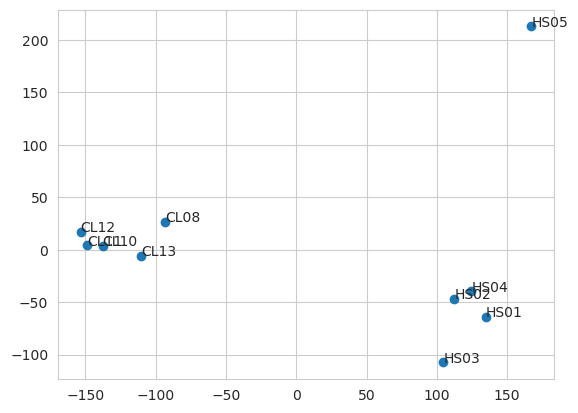

In [82]:
from sklearn.decomposition import PCA
l2pca = PCA(n_components=2).fit_transform(l2tmm.values.T)
plt.scatter(l2pca[:,0], l2pca[:,1])
for (pc1, pc2), label in zip (l2pca, l2tmm.columns):
    plt.annotate(label, (pc1, pc2))

<Axes: >

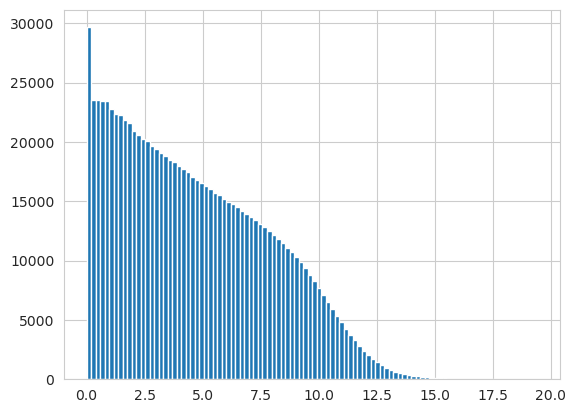

In [85]:
controls = l2tmm.columns[:5]
l2tmm[controls].median(axis=1).hist(cumulative=-1, bins=100)

In [88]:
MINEXPRESSION = 4
l2hi = l2tmm[l2tmm[controls].median(axis=1)>= MINEXPRESSION].copy()
l2hi.head()

,HS01,HS02,HS03,HS04,HS05,CL08,CL10,CL11,CL12,CL13
gene_info,,,,,,,,,,
ENSG00000000003|TSPAN6|776,10.204020,10.263910,10.330988,10.190933,10.004849,9.781662,9.373056,9.698788,9.137775,9.203144
ENSG00000000005|TNMD|956,8.870366,8.283324,9.378216,8.466179,8.921036,3.451532,4.366348,3.676718,1.710637,2.247919
ENSG00000000419|DPM1|912,10.895736,10.891886,10.815224,10.812123,10.436061,11.066686,10.526284,11.267594,11.046649,10.941359
ENSG00000000457|SCYL3|6059,10.625919,10.322008,10.707006,10.367919,9.933916,10.482510,10.336910,10.838104,10.754597,10.400645
ENSG00000000460|C1orf112|676,8.700674,8.570087,9.073661,8.878140,8.219095,8.240829,9.295813,9.590984,9.249234,8.940972


In [89]:
cols_disease = l2hi.columns[5:10]
cols_healthy = l2hi.columns[:5]
cols_allsamples = l2hi.columns[:10]

In [91]:
from scipy.stats import ttest_ind

In [92]:
l2hi['p.value'] = l2hi.apply(lambda row: 
                             ttest_ind(row[cols_healthy],
                                       row[cols_disease])[1], axis=1)

l2hi['fc'] = l2hi.apply(lambda row:
                        row[cols_disease].mean() - row[cols_healthy].mean(),
                        axis=1)
l2hi.head()

,HS01,HS02,HS03,HS04,HS05,CL08,CL10,CL11,CL12,CL13,p.value,fc
gene_info,,,,,,,,,,,,
ENSG00000000003|TSPAN6|776,10.204020,10.263910,10.330988,10.190933,10.004849,9.781662,9.373056,9.698788,9.137775,9.203144,0.000640,-0.760055
ENSG00000000005|TNMD|956,8.870366,8.283324,9.378216,8.466179,8.921036,3.451532,4.366348,3.676718,1.710637,2.247919,0.000004,-5.693193
ENSG00000000419|DPM1|912,10.895736,10.891886,10.815224,10.812123,10.436061,11.066686,10.526284,11.267594,11.046649,10.941359,0.218998,0.199508
ENSG00000000457|SCYL3|6059,10.625919,10.322008,10.707006,10.367919,9.933916,10.482510,10.336910,10.838104,10.754597,10.400645,0.338462,0.171199
ENSG00000000460|C1orf112|676,8.700674,8.570087,9.073661,8.878140,8.219095,8.240829,9.295813,9.590984,9.249234,8.940972,0.204735,0.375235


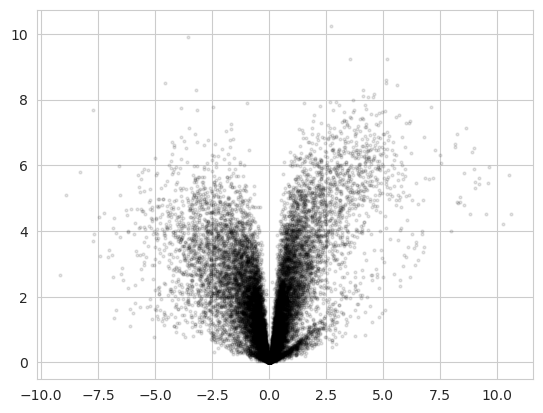

In [93]:
plt.scatter(l2hi['fc'], -np.log10(l2hi['p.value']), c='black', s=4, alpha=.1)
plt.grid(True)

In [142]:
pvalues = l2hi['p.value']
l2hi['fdr'] = %R -i pvalues p.adjust(pvalues, 'BH')

In [141]:
l2hi.head()

,HS01,HS02,HS03,HS04,HS05,CL08,CL10,CL11,CL12,CL13,p.value,fc,fdr
gene_info,,,,,,,,,,,,,
ENSG00000000003|TSPAN6|776,10.204020,10.263910,10.330988,10.190933,10.004849,9.781662,9.373056,9.698788,9.137775,9.203144,0.000640,-0.760055,0.003449
ENSG00000000005|TNMD|956,8.870366,8.283324,9.378216,8.466179,8.921036,3.451532,4.366348,3.676718,1.710637,2.247919,0.000004,-5.693193,0.000120
ENSG00000000419|DPM1|912,10.895736,10.891886,10.815224,10.812123,10.436061,11.066686,10.526284,11.267594,11.046649,10.941359,0.218998,0.199508,0.321532
ENSG00000000457|SCYL3|6059,10.625919,10.322008,10.707006,10.367919,9.933916,10.482510,10.336910,10.838104,10.754597,10.400645,0.338462,0.171199,0.452376
ENSG00000000460|C1orf112|676,8.700674,8.570087,9.073661,8.878140,8.219095,8.240829,9.295813,9.590984,9.249234,8.940972,0.204735,0.375235,0.305025


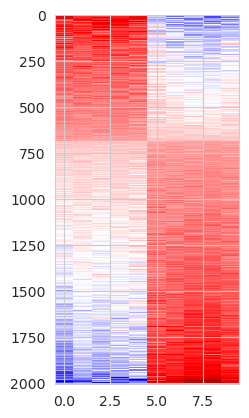

In [137]:
diffexpr = l2hi[l2hi['fdr']<0.001].sort_values(by='fc').iloc[:,:10]
diffexpr = diffexpr.sub(diffexpr.mean(axis=1),axis=0)
plt.imshow(diffexpr, aspect=1/100, interpolation='nearest',
           cmap='seismic')

In [138]:
downreg = l2hi[(l2hi['fc']<-2.5)&l2hi['p.value']<1e-6].sort_values(by='fc')

In [139]:
upreg = l2hi[(l2hi['fc']>2.5)&l2hi['p.value']<1e-6].sort_values(
    by='fc', ascending=False)

In [140]:
len(downreg), len(upreg)

(16868, 17000)

In [122]:
with open('upreg.txt','w') as output:
    print(*upreg.index.to_series().str.split('|').str[0], sep='\n',
         file=output)